In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [2]:
X = pd.read_csv('clean_data')

In [3]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0          1              0   40               1      2              534   
1          0              0   49               0      0              383   
2          1              0   19               0      0              550   
3          0              0   15               0      0             1127   
4          1              0   51               0      0              226   
...      ...            ...  ...             ...    ...              ...   
5995       0              0   16               0      0              967   
5996       1              0   68               0      0              913   
5997       1              0   50               0      0             1999   
5998       0              0   30               1      2              946   
5999       0              1   49               1      0             2475   

      Inflight wifi service  Departure/Arrival time convenient  \
0                         3                                  5   
1                         4                                  4   
2                         2                                  3   
3                         3                                  5   
4                         2                                  3   
...                     ...                                ...   
5995                      2                                  4   
5996                      1                                  5   
5997                      1                                  5   
5998                      4                                  4   
5999                      2                                  2   

      Ease of Online booking  Gate location  ...  Seat comfort  \
0                          3              3  ...             5   
1                          4              1  ...             2   
2                          2              4  ...             1   
3                          3              3  ...             2   
4                          0              3  ...             2   
...                      ...            ...  ...           ...   
5995                       2              4  ...             4   
5996                       1              3  ...             5   
5997                       1              2  ...             5   
5998                       4              4  ...             4   
5999                       2              4  ...             2   

      Inflight entertainment  On-board service  Leg room service  \
0                          5                 5                 5   
1                          2                 3                 2   
2                          1                 4                 4   
3                          2                 4                 4   
4                          2                 2                 0   
...                      ...               ...               ...   
5995                       4                 3                 4   
5996                       1                 1                 1   
5997                       5                 5                 1   
5998                       4                 4                 5   
5999                       2                 1                 3   

      Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    5                4                 5            3   
1                    4                4                 5            2   
2                    4                1                 3            1   
3                    4                5                 4            2   
4                    3                2                 2            2   
...                ...              ...               ...          ...   
5995                 4                4                 5            4   
5996                 1                3                 1            2   
5997                 5  

In [4]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [5]:
G = nx.from_numpy_matrix(A)

In [6]:
nx.is_connected(G)

True

In [7]:
#nx.draw(G,node_size=20)

In [8]:
features = pd.Series(X.satisfaction) 

In [9]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [10]:
pos = nx.spring_layout(G)

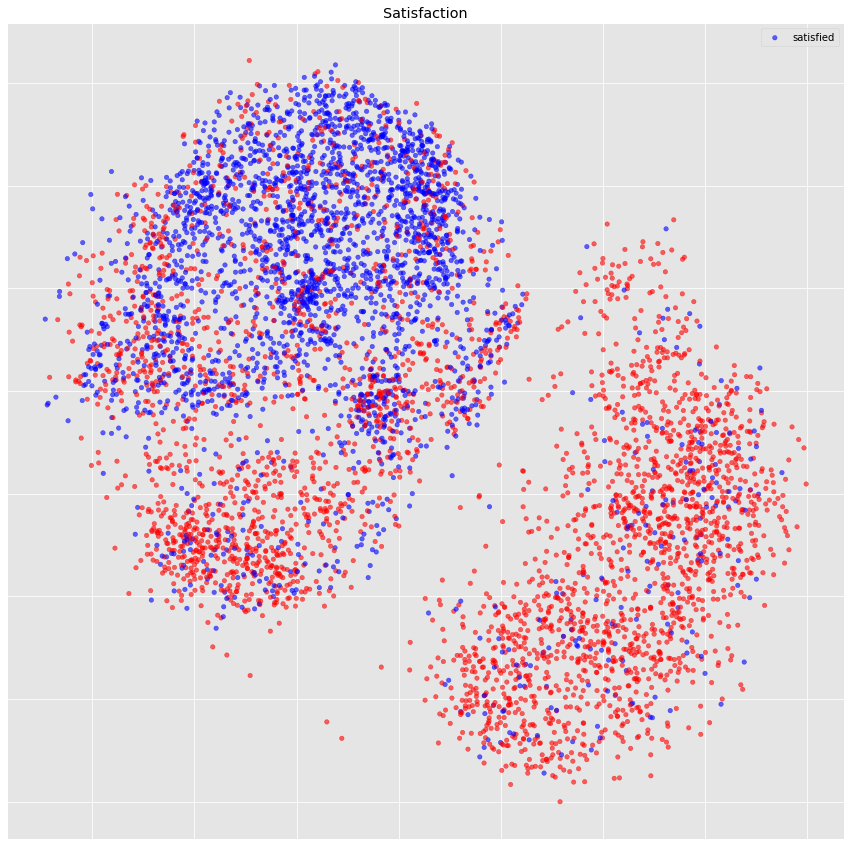

In [11]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend(['satisfied' ,'dissatisfied or neutral'])
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

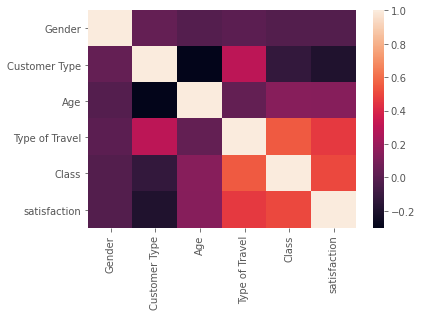

In [12]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [13]:
colmapvar = pd.Series(X['Gender']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


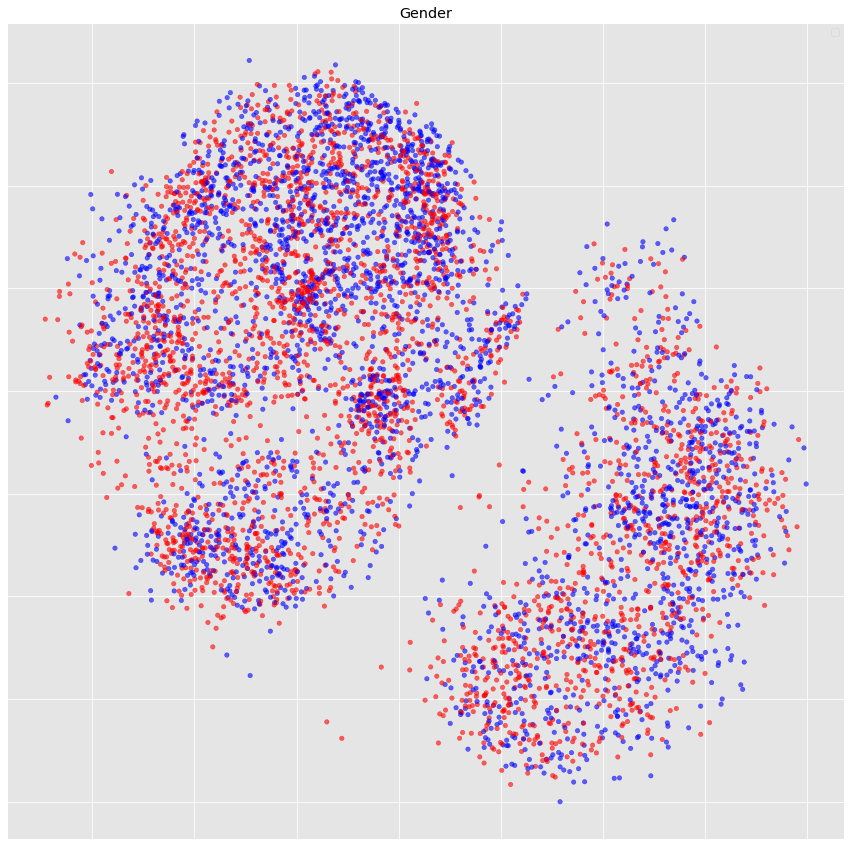

In [14]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Gender')
plt.show()

In [15]:
colmapvar = pd.Series(X['Customer Type']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


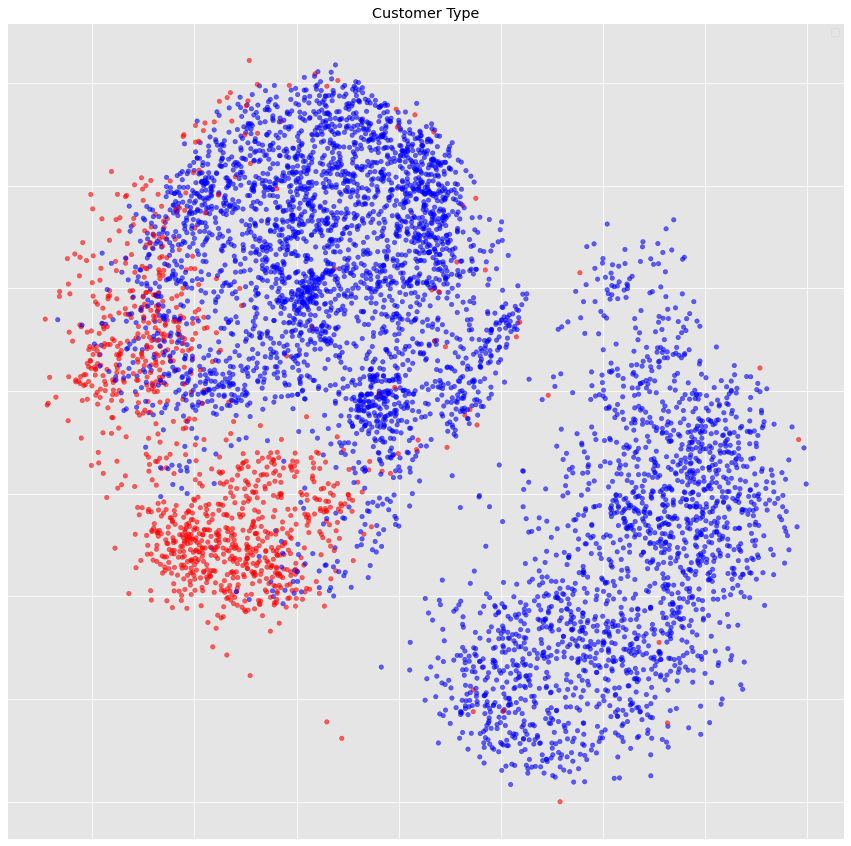

In [16]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Customer Type')
plt.show()

In [17]:
colmapvar = pd.Series(X['Class']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    else:
        color_map.append('green')

No handles with labels found to put in legend.


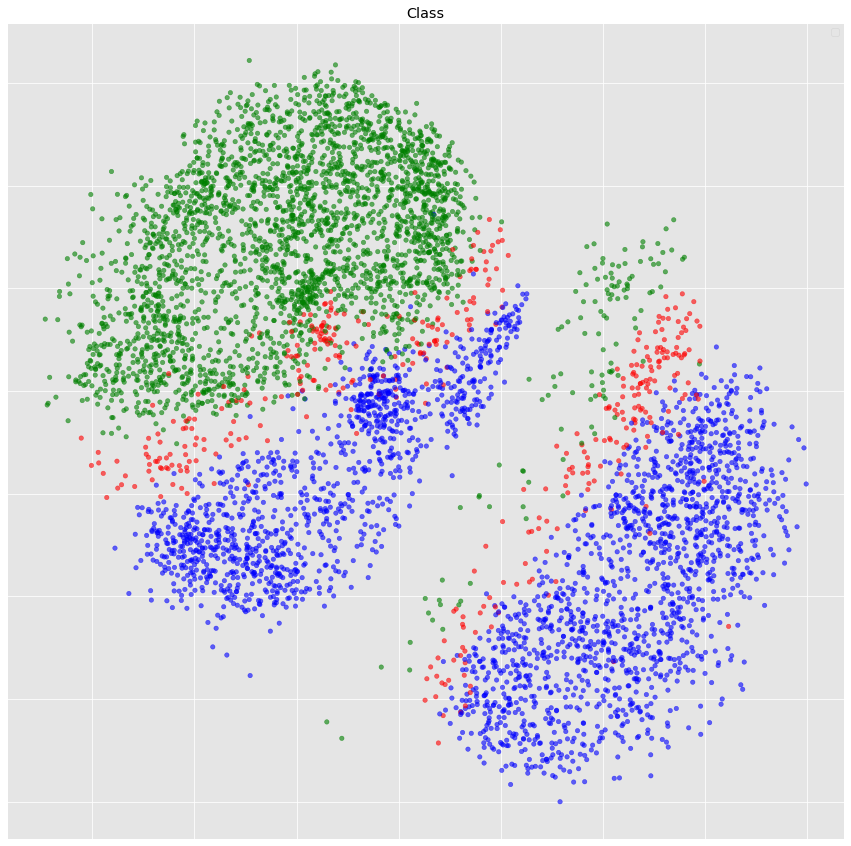

In [18]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Class')
plt.show()

In [19]:
colmapvar = pd.Series(X['Type of Travel']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


No handles with labels found to put in legend.


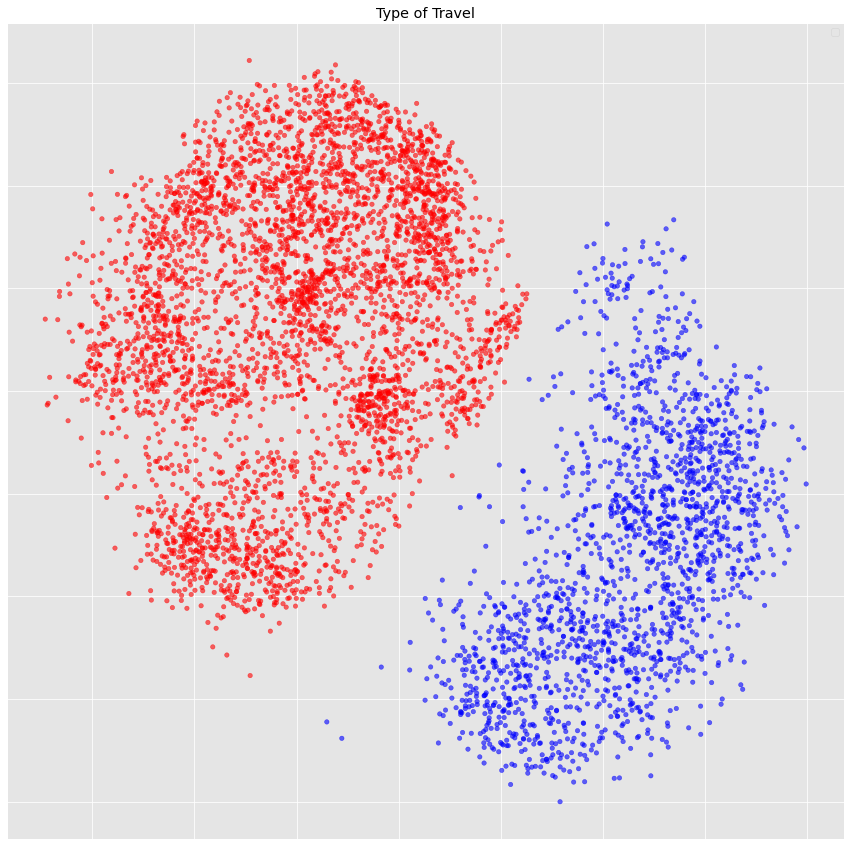

In [20]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Type of Travel')
plt.show()

In [21]:
colmapvar = pd.Series(X['Age']) 
colmapvar = colmapvar.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    elif i[1] == 2:
        color_map.append('green')
    elif i[1] == 3:
        color_map.append('brown')
    else:
        color_map.append('purple')

No handles with labels found to put in legend.


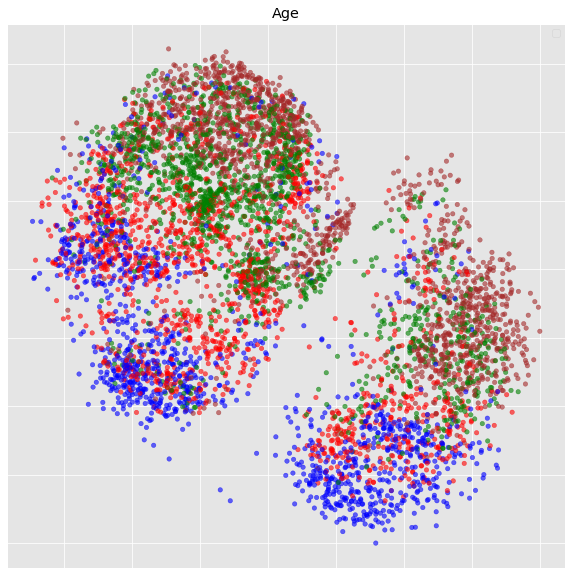

In [22]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Age')
plt.show()

In [23]:
# node2vec
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [24]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

In [25]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.511967
         Iterations 6


In [26]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.2550
Time:                        18:01:17   Log-Likelihood:                -3071.8
converged:                       True   LL-Null:                       -4122.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6431      0.361    -10.089      0.000      -4.351      -2.935
x1             3.2748      0.355      9.220      0.000       2.579       3.971
x2            -0.9065      0.027    -33.039      0.0

In [27]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [28]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.7, shuffle=True)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=1)

Epoch 1/60
1800/1800 [==============================] - 7s 4ms/step - loss: 0.6093 - accuracy: 0.6558 - val_loss: 0.5145 - val_accuracy: 0.7662
Epoch 2/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.5129 - accuracy: 0.7618 - val_loss: 0.5130 - val_accuracy: 0.7674
Epoch 3/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.4887 - accuracy: 0.7938 - val_loss: 0.5105 - val_accuracy: 0.7707
Epoch 4/60
1800/1800 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.7697 - val_loss: 0.5101 - val_accuracy: 0.7707
Epoch 5/60
1800/1800 [==============================] - 9s 5ms/step - loss: 0.5031 - accuracy: 0.7734 - val_loss: 0.5097 - val_accuracy: 0.7702
Epoch 6/60
1800/1800 [==============================] - 6s 3ms/step - loss: 0.4954 - accuracy: 0.7782 - val_loss: 0.5104 - val_accuracy: 0.7707
Epoch 7/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.5212 - accuracy: 0.7606 - val_loss: 0.5100 - val_accuracy:

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.77
-------------------------------------------------------------
Confusion Matrix validation set:
[[2542  786]
 [ 594 2078]]


In [125]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=X['Class'],alpha=0.8)
plt.show()

NameError: name 'Z' is not defined

<Figure size 1080x1080 with 0 Axes>

In [54]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.3)
G_dgl.ndata['label'] = torch.tensor(features)

In [55]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [56]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [57]:
train_nodes = (train_mask == True).nonzero(as_tuple=False)
train_nids = torch.reshape(train_nodes,(-1,))
valid_nodes = (valid_mask == True).nonzero(as_tuple=False)
valid_nids = torch.reshape(valid_nodes,(-1,))

In [136]:
batch_size = 20
sampler = dgl.dataloading.MultiLayerNeighborSampler([4, 4, 4])
#sampler = dgl.dataloading.MultiLayerNeighborSampler([None])
train_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, train_nids, sampler,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=0
)

In [137]:
example_minibatch = next(iter(train_dataloader))
print(example_minibatch)

[tensor([5219,  428, 1598,  ..., 1167,  748,  913]), tensor([5219,  428, 1598, 3051, 1516,  501,  482, 5741, 5836, 4763,  563, 5084,
        3413, 1910, 1357, 4305, 5082, 1705, 5117, 2357]), [Block(num_src_nodes=1964, num_dst_nodes=480, num_edges=1920), Block(num_src_nodes=480, num_dst_nodes=100, num_edges=400), Block(num_src_nodes=100, num_dst_nodes=20, num_edges=80)]]


In [138]:
input_nodes, output_nodes, bipartite = example_minibatch
print("To compute {} nodes' output we need {} nodes' input features".format(len(output_nodes), len(input_nodes)))

To compute 20 nodes' output we need 1964 nodes' input features


In [139]:
batch_size = len(valid_nids)
valid_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, valid_nids, sampler,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=0
)

In [148]:
import tqdm
import sklearn.metrics

class SAGE(nn.Module):
    def __init__(self, in_feats, n_hidden, n_classes, n_layers):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.n_classes = n_classes
        self.layers = nn.ModuleList()
        self.layers.append(dglnn.SAGEConv(in_feats, n_hidden, 'pool'))
        for i in range(1, n_layers - 1):
            self.layers.append(dglnn.SAGEConv(n_hidden, n_hidden, 'pool'))
        self.layers.append(dglnn.SAGEConv(n_hidden, n_classes, 'pool'))
        
    def forward(self, bipartite, x):
        for l, (layer, bipartite) in enumerate(zip(self.layers, bipartite)):
            x = layer(bipartite, x)
            #x = F.normalize(x, p=2, dim=-1)
            #x = F.relu(x)
            if l != self.n_layers - 1:
                #x = F.normalize(x, p=2, dim=-1)
                x = F.relu(x)
        return x

In [149]:
model = SAGE(n_features, 128, n_labels, 3)
opt = torch.optim.Adam(model.parameters())

In [150]:
best_accuracy = 0
best_model_path = 'model.pt'
plot_loss_train = []
plot_loss_valid = []
train_acc = []
valid_acc = []

for epoch in range(50):
    model.train()
    
    with tqdm.tqdm(train_dataloader) as tq:
        for step, (input_nodes, output_nodes, bipartite) in enumerate(tq):
            bipartite = [b.to(torch.device('cpu')) for b in bipartite]
            inputs = node_features[input_nodes]
            labels = node_labels[output_nodes]
            predictions = model(bipartite, inputs)

            loss = F.cross_entropy(predictions, labels)
            opt.zero_grad()
            loss.backward()
            opt.step()

            accuracy = sklearn.metrics.accuracy_score(labels.cpu().numpy(), predictions.argmax(1).detach().cpu().numpy())
            tq.set_postfix({'loss': '%.03f' % loss.item(), 'acc': '%.03f' % accuracy}, refresh=False)
    plot_loss_train.append(loss.item())
    train_acc.append(accuracy.item())
        
    model.eval()
    
    predictions = []
    labels = []
    with tqdm.tqdm(valid_dataloader) as tq, torch.no_grad():
        for input_nodes, output_nodes, bipartite in tq:
            bipartite = [b.to(torch.device('cpu')) for b in bipartite]
            inputs = node_features[input_nodes]
            labels.append(node_labels[output_nodes].numpy())
            predictions.append(model(bipartite, inputs).argmax(1).cpu().numpy())
            valid_pred = model(bipartite, inputs)
            valid_labels = node_labels[output_nodes]
            valid_loss = F.cross_entropy(valid_pred, valid_labels)
        predictions = np.concatenate(predictions)
        labels = np.concatenate(labels)
        
        accuracy = sklearn.metrics.accuracy_score(labels, predictions)
        print('Epoch {} Validation Accuracy {}'.format(epoch, accuracy))
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), best_model_path)
            
    valid_acc.append(accuracy.item())
    plot_loss_valid.append(valid_loss.item())


  4%|▍         | 4/89 [00:00<00:02, 34.76it/s, loss=0.752, acc=0.800]

Epoch 0 Validation Accuracy 0.795561850802644


  4%|▍         | 4/89 [00:00<00:02, 33.76it/s, loss=0.404, acc=0.900]

Epoch 1 Validation Accuracy 0.8267233238904627


  3%|▎         | 3/89 [00:00<00:03, 23.16it/s, loss=0.337, acc=0.950]

Epoch 2 Validation Accuracy 0.8356940509915014


  3%|▎         | 3/89 [00:00<00:03, 24.28it/s, loss=0.449, acc=0.850]

Epoch 3 Validation Accuracy 0.8609537299339


  4%|▍         | 4/89 [00:00<00:02, 33.83it/s, loss=0.156, acc=0.950]

Epoch 4 Validation Accuracy 0.880547686496695


  4%|▍         | 4/89 [00:00<00:02, 36.88it/s, loss=0.258, acc=0.850]

Epoch 5 Validation Accuracy 0.8845609065155807


  4%|▍         | 4/89 [00:00<00:02, 39.24it/s, loss=0.498, acc=0.900]

Epoch 6 Validation Accuracy 0.853399433427762


  4%|▍         | 4/89 [00:00<00:02, 38.39it/s, loss=0.130, acc=1.000]

Epoch 7 Validation Accuracy 0.8897544853635505


  4%|▍         | 4/89 [00:00<00:02, 36.32it/s, loss=0.302, acc=0.850]

Epoch 8 Validation Accuracy 0.8968366383380547


  4%|▍         | 4/89 [00:00<00:02, 37.59it/s, loss=0.141, acc=0.950]

Epoch 9 Validation Accuracy 0.8980169971671388


  3%|▎         | 3/89 [00:00<00:03, 21.60it/s, loss=0.494, acc=0.750]

Epoch 10 Validation Accuracy 0.8734655335221907


  3%|▎         | 3/89 [00:00<00:03, 27.43it/s, loss=0.274, acc=0.750]

Epoch 11 Validation Accuracy 0.9003777148253069


  2%|▏         | 2/89 [00:00<00:05, 17.26it/s, loss=0.047, acc=1.000]

Epoch 12 Validation Accuracy 0.9020302171860245


  4%|▍         | 4/89 [00:00<00:02, 34.32it/s, loss=0.051, acc=1.000]

Epoch 13 Validation Accuracy 0.9036827195467422


  3%|▎         | 3/89 [00:00<00:03, 27.73it/s, loss=0.228, acc=0.850]

Epoch 14 Validation Accuracy 0.907695939565628


  3%|▎         | 3/89 [00:00<00:02, 28.85it/s, loss=0.435, acc=0.900]

Epoch 15 Validation Accuracy 0.8968366383380547


  4%|▍         | 4/89 [00:00<00:02, 37.19it/s, loss=0.128, acc=0.950]

Epoch 16 Validation Accuracy 0.9048630783758262


  4%|▍         | 4/89 [00:00<00:02, 37.07it/s, loss=0.128, acc=0.950]

Epoch 17 Validation Accuracy 0.9133616619452314


  4%|▍         | 4/89 [00:00<00:02, 36.22it/s, loss=0.237, acc=0.900]

Epoch 18 Validation Accuracy 0.9069877242681775


  6%|▌         | 5/89 [00:00<00:01, 43.22it/s, loss=0.299, acc=0.850]

Epoch 19 Validation Accuracy 0.908876298394712


  4%|▍         | 4/89 [00:00<00:02, 34.63it/s, loss=0.083, acc=1.000]

Epoch 20 Validation Accuracy 0.8911709159584513


  4%|▍         | 4/89 [00:00<00:02, 37.42it/s, loss=0.225, acc=0.900]

Epoch 21 Validation Accuracy 0.9107648725212465


  6%|▌         | 5/89 [00:00<00:01, 44.76it/s, loss=0.163, acc=0.950]

Epoch 22 Validation Accuracy 0.9084041548630784


  4%|▍         | 4/89 [00:00<00:02, 32.73it/s, loss=0.058, acc=1.000]

Epoch 23 Validation Accuracy 0.9060434372049103


  4%|▍         | 4/89 [00:00<00:02, 39.11it/s, loss=0.139, acc=0.950]

Epoch 24 Validation Accuracy 0.9102927289896129


  4%|▍         | 4/89 [00:00<00:02, 38.92it/s, loss=0.103, acc=1.000]

Epoch 25 Validation Accuracy 0.8881019830028328


  4%|▍         | 4/89 [00:00<00:02, 39.50it/s, loss=0.150, acc=0.950]

Epoch 26 Validation Accuracy 0.9183191690273843


  3%|▎         | 3/89 [00:00<00:03, 27.06it/s, loss=0.029, acc=1.000]

Epoch 27 Validation Accuracy 0.9079320113314447


  6%|▌         | 5/89 [00:00<00:01, 44.45it/s, loss=0.070, acc=1.000]

Epoch 28 Validation Accuracy 0.8932955618508026


  6%|▌         | 5/89 [00:00<00:01, 45.48it/s, loss=0.073, acc=1.000]

Epoch 29 Validation Accuracy 0.9124173748819642


  2%|▏         | 2/89 [00:00<00:04, 17.62it/s, loss=0.076, acc=0.950]

Epoch 30 Validation Accuracy 0.9204438149197356


  7%|▋         | 6/89 [00:00<00:01, 54.43it/s, loss=0.034, acc=1.000]

Epoch 31 Validation Accuracy 0.9169027384324835


  7%|▋         | 6/89 [00:00<00:01, 56.11it/s, loss=0.121, acc=0.950]

Epoch 32 Validation Accuracy 0.908876298394712


  7%|▋         | 6/89 [00:00<00:01, 56.25it/s, loss=0.101, acc=0.950]

Epoch 33 Validation Accuracy 0.913833805476865


  6%|▌         | 5/89 [00:00<00:01, 45.16it/s, loss=0.155, acc=0.950]

Epoch 34 Validation Accuracy 0.902738432483475


  7%|▋         | 6/89 [00:00<00:01, 55.83it/s, loss=0.050, acc=1.000]

Epoch 35 Validation Accuracy 0.9124173748819642


  6%|▌         | 5/89 [00:00<00:01, 44.24it/s, loss=0.033, acc=1.000]

Epoch 36 Validation Accuracy 0.9135977337110481


  6%|▌         | 5/89 [00:00<00:01, 43.12it/s, loss=0.033, acc=1.000]

Epoch 37 Validation Accuracy 0.9150141643059491


  7%|▋         | 6/89 [00:00<00:01, 55.14it/s, loss=0.325, acc=0.950]

Epoch 38 Validation Accuracy 0.9154863078375827


  7%|▋         | 6/89 [00:00<00:01, 53.17it/s, loss=0.223, acc=0.850]

Epoch 39 Validation Accuracy 0.9143059490084986


  7%|▋         | 6/89 [00:00<00:01, 49.90it/s, loss=0.214, acc=0.900]

Epoch 40 Validation Accuracy 0.9173748819641171


  7%|▋         | 6/89 [00:00<00:01, 52.02it/s, loss=0.056, acc=1.000]

Epoch 41 Validation Accuracy 0.9128895184135978


  6%|▌         | 5/89 [00:00<00:01, 48.00it/s, loss=0.055, acc=0.950]

Epoch 42 Validation Accuracy 0.9105288007554296


  7%|▋         | 6/89 [00:00<00:01, 52.99it/s, loss=0.018, acc=1.000]

Epoch 43 Validation Accuracy 0.9187913125590179


  6%|▌         | 5/89 [00:00<00:01, 50.00it/s, loss=0.060, acc=0.950]

Epoch 44 Validation Accuracy 0.9157223796033994


  6%|▌         | 5/89 [00:00<00:01, 47.81it/s, loss=0.003, acc=1.000]

Epoch 45 Validation Accuracy 0.9135977337110481


  7%|▋         | 6/89 [00:00<00:01, 56.06it/s, loss=0.054, acc=0.950]

Epoch 46 Validation Accuracy 0.9154863078375827


  7%|▋         | 6/89 [00:00<00:01, 55.04it/s, loss=0.032, acc=1.000]

Epoch 47 Validation Accuracy 0.9166666666666666


  6%|▌         | 5/89 [00:00<00:01, 49.66it/s, loss=0.005, acc=1.000]

Epoch 48 Validation Accuracy 0.9147780925401322


100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

Epoch 49 Validation Accuracy 0.9152502360717658


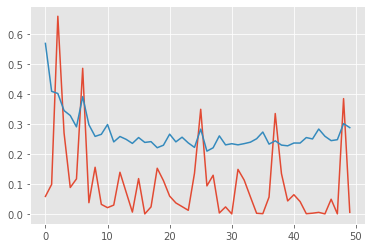

In [151]:
plt.plot(plot_loss_train)
plt.plot(plot_loss_valid)
plt.show()

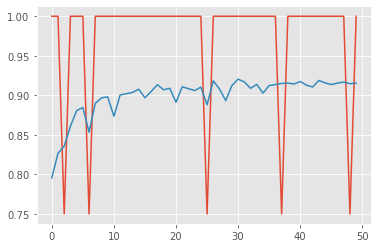

In [152]:
plt.plot(train_acc)
plt.plot(valid_acc)
plt.show()

In [153]:
best_accuracy

0.9204438149197356

In [29]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=6000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [30]:
TEST = df_test.copy(deep=True)

In [31]:
test_gen = TEST[['Gender','Customer Type','Age','Type of Travel','Class']].copy(deep=True)
test_gen.Age = test_gen.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [32]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.20

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [33]:
x = test_gen.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [34]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0

In [35]:
A = A + A.T - np.diag(np.diag(A))

In [36]:
G_test = nx.from_numpy_matrix(A)

In [37]:
test_features = pd.Series(TEST.satisfaction)

In [38]:
G_dgl_test = dgl.from_networkx(G_test)
feat = TEST.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl_test.ndata['feat'] =  embedding
#G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl_test.ndata['label'] = torch.tensor(test_features)

In [39]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
test_nids = G_dgl.nodes()
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [40]:
def inference(model, graph, input_features, batch_size):
    nodes = torch.arange(graph.number_of_nodes())
    
    sampler = dgl.dataloading.MultiLayerNeighborSampler([None])  # one layer at a time, taking all neighbors
    dataloader = dgl.dataloading.NodeDataLoader(
        graph, nodes, sampler,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        num_workers=0)
    
    with torch.no_grad():
        for l, layer in enumerate(model.layers):
            # Allocate a buffer of output representations for every node
            # Note that the buffer is on CPU memory.
            output_features = torch.zeros(
                graph.number_of_nodes(), model.n_hidden if l != model.n_layers - 1 else model.n_classes)

            for input_nodes, output_nodes, bipartites in tqdm.tqdm(dataloader):
                bipartite = bipartites[0].to(torch.device('cpu'))

                x = input_features[input_nodes]

                # the following code is identical to the loop body in model.forward()
                x = layer(bipartite, x)
                if l != model.n_layers - 1:
                    x = F.relu(x)

                output_features[output_nodes] = x.cpu()
            input_features = output_features
    return output_features

In [146]:
model.load_state_dict(torch.load('model.pt'))
all_predictions = inference(model, G_dgl_test, node_features, 6000)

100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


In [147]:
test_predictions = all_predictions[test_nids].argmax(1)
test_labels = node_labels[test_nids]
test_accuracy = sklearn.metrics.accuracy_score(test_predictions.numpy(), test_labels.numpy())
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9421666666666667


In [41]:

model = SAGE(in_feats=n_features, hid_feats_1=120, hid_feats_2 = 100, hid_feats_3=40, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(200):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    
    if epoch % 1 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.8830, validation loss: 0.8866, training accuracy: 0.4247, validation accuracy: 0.4256, Time: 2.0401
Epoch: 1, train loss: 0.7038, validation loss: 0.7001, training accuracy: 0.5537, validation accuracy: 0.5664, Time: 2.3688
Epoch: 2, train loss: 0.6007, validation loss: 0.5988, training accuracy: 0.6657, validation accuracy: 0.6909, Time: 2.2929
Epoch: 3, train loss: 0.5614, validation loss: 0.5596, training accuracy: 0.7203, validation accuracy: 0.7234, Time: 2.1657
Epoch: 4, train loss: 0.5330, validation loss: 0.5291, training accuracy: 0.7408, validation accuracy: 0.7479, Time: 2.0805
Epoch: 5, train loss: 0.5066, validation loss: 0.5015, training accuracy: 0.7612, validation accuracy: 0.7708, Time: 2.0263
Epoch: 6, train loss: 0.4839, validation loss: 0.4790, training accuracy: 0.7902, validation accuracy: 0.7967, Time: 2.0226
Epoch: 7, train loss: 0.4661, validation loss: 0.4619, training accuracy: 0.8101, validation accuracy: 0.8168, Time: 2.0216
Epoch: 8

Epoch: 66, train loss: 0.3389, validation loss: 0.3656, training accuracy: 0.9113, validation accuracy: 0.8899, Time: 2.3066
Epoch: 67, train loss: 0.3380, validation loss: 0.3649, training accuracy: 0.9113, validation accuracy: 0.8908, Time: 2.3042
Epoch: 68, train loss: 0.3371, validation loss: 0.3640, training accuracy: 0.9119, validation accuracy: 0.8906, Time: 2.2987
Epoch: 69, train loss: 0.3363, validation loss: 0.3632, training accuracy: 0.9119, validation accuracy: 0.8908, Time: 2.2973
Epoch: 70, train loss: 0.3354, validation loss: 0.3629, training accuracy: 0.9136, validation accuracy: 0.8908, Time: 2.2947
Epoch: 71, train loss: 0.3350, validation loss: 0.3624, training accuracy: 0.9142, validation accuracy: 0.8908, Time: 2.2935
Epoch: 72, train loss: 0.3394, validation loss: 0.3603, training accuracy: 0.9073, validation accuracy: 0.8937, Time: 2.2921
Epoch: 73, train loss: 0.3345, validation loss: 0.3608, training accuracy: 0.9142, validation accuracy: 0.8920, Time: 2.2909


Epoch: 132, train loss: 0.2858, validation loss: 0.3512, training accuracy: 0.9534, validation accuracy: 0.9003, Time: 2.1985
Epoch: 133, train loss: 0.2841, validation loss: 0.3506, training accuracy: 0.9534, validation accuracy: 0.8996, Time: 2.1955
Epoch: 134, train loss: 0.2843, validation loss: 0.3509, training accuracy: 0.9545, validation accuracy: 0.9005, Time: 2.1937
Epoch: 135, train loss: 0.2824, validation loss: 0.3509, training accuracy: 0.9557, validation accuracy: 0.9000, Time: 2.1936
Epoch: 136, train loss: 0.2821, validation loss: 0.3517, training accuracy: 0.9562, validation accuracy: 0.8991, Time: 2.1925
Epoch: 137, train loss: 0.2809, validation loss: 0.3513, training accuracy: 0.9551, validation accuracy: 0.8996, Time: 2.1938
Epoch: 138, train loss: 0.2802, validation loss: 0.3515, training accuracy: 0.9562, validation accuracy: 0.9010, Time: 2.1913
Epoch: 139, train loss: 0.2791, validation loss: 0.3516, training accuracy: 0.9579, validation accuracy: 0.9000, Time:

Epoch: 198, train loss: 0.2536, validation loss: 0.3526, training accuracy: 0.9778, validation accuracy: 0.9012, Time: 2.1597
Epoch: 199, train loss: 0.2507, validation loss: 0.3517, training accuracy: 0.9790, validation accuracy: 0.9007, Time: 2.1582


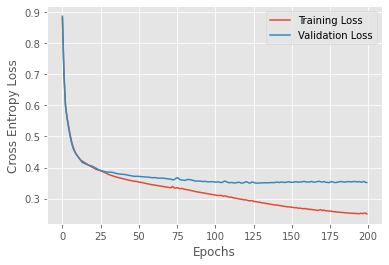

In [42]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

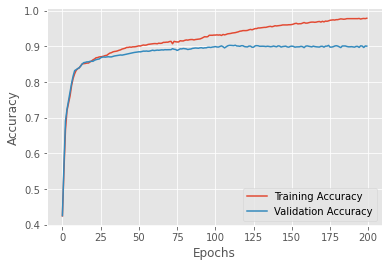

In [43]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=-1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=-1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.9007309596793209
-------------------------------------------------------------
Classification Accuracy training set 0.9789653212052303
-------------------------------------------------------------
Confusion Matrix validation set:
[[2192  154]
 [ 267 1628]]
-------------------------------------------------------------
Confusion Matrix training set:
[[977   5]
 [ 32 745]]


In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(val_lab,indices_val)

0.898316309636007

In [43]:
class GCN(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.GraphConv(
            in_feats=in_feats, out_feats=hid_feats_1)
        
        self.conv2 = dglnn.pytorch.conv.GraphConv(
            in_feats=hid_feats_1, out_feats=out_feats)
        
#        self.conv3 = dglnn.pytorch.conv.GraphConv(
#            in_feats=hid_feats_2, out_feats=out_feats)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
#        h = F.relu(h)
#        h = self.conv3(graph,h)
        h = F.log_softmax(h,dim=1)
        return h

In [44]:
model = GCN(in_feats=n_features, hid_feats_1=100, hid_feats_2=50, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(150):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.7181, validation loss: 0.7183, training accuracy: 0.3156, validation accuracy: 0.3046, Time: 0.4928
Epoch: 10, train loss: 0.6556, validation loss: 0.6544, training accuracy: 0.7522, validation accuracy: 0.7623, Time: 0.3898
Epoch: 20, train loss: 0.6089, validation loss: 0.6067, training accuracy: 0.7534, validation accuracy: 0.7635, Time: 0.3926
Epoch: 30, train loss: 0.5731, validation loss: 0.5705, training accuracy: 0.7573, validation accuracy: 0.7661, Time: 0.3968
Epoch: 40, train loss: 0.5456, validation loss: 0.5433, training accuracy: 0.7635, validation accuracy: 0.7690, Time: 0.4161
Epoch: 50, train loss: 0.5256, validation loss: 0.5240, training accuracy: 0.7724, validation accuracy: 0.7697, Time: 0.4195
Epoch: 60, train loss: 0.5122, validation loss: 0.5113, training accuracy: 0.7696, validation accuracy: 0.7728, Time: 0.4150
Epoch: 70, train loss: 0.5038, validation loss: 0.5037, training accuracy: 0.7719, validation accuracy: 0.7732, Time: 0.4150
E

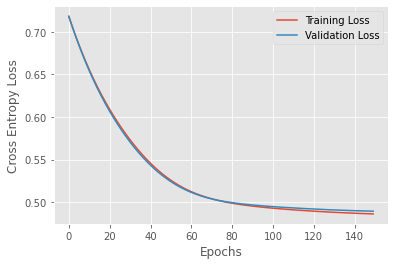

In [45]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

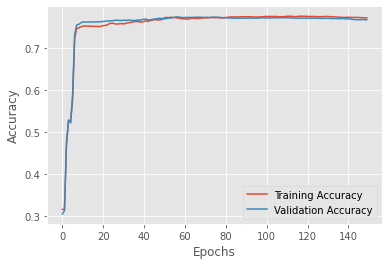

In [46]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:

val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.767314990512334
-------------------------------------------------------------
Classification Accuracy training set 0.7718609865470852
-------------------------------------------------------------
Confusion Matrix validation set:
[[1790  534]
 [ 447 1445]]
-------------------------------------------------------------
Confusion Matrix training set:
[[761 243]
 [164 616]]


In [48]:
roc_auc_score(val_lab,indices_val)

0.7669829120165349

In [49]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.7, shuffle=True)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(layers.LSTM(128))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=5)

Epoch 1/60
360/360 [==============================] - 2s 5ms/step - loss: 0.5541 - accuracy: 0.7551 - val_loss: 0.4047 - val_accuracy: 0.8383
Epoch 2/60
360/360 [==============================] - 2s 4ms/step - loss: 0.3842 - accuracy: 0.8533 - val_loss: 0.3520 - val_accuracy: 0.8562
Epoch 3/60
360/360 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8665 - val_loss: 0.3290 - val_accuracy: 0.8710
Epoch 4/60
360/360 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.8745 - val_loss: 0.3108 - val_accuracy: 0.8807
Epoch 5/60
360/360 [==============================] - 2s 6ms/step - loss: 0.2705 - accuracy: 0.8861 - val_loss: 0.2958 - val_accuracy: 0.8879
Epoch 6/60
360/360 [==============================] - 2s 5ms/step - loss: 0.2705 - accuracy: 0.8909 - val_loss: 0.2849 - val_accuracy: 0.8957
Epoch 7/60
360/360 [==============================] - 2s 5ms/step - loss: 0.2463 - accuracy: 0.9018 - val_loss: 0.2752 - val_accuracy: 0.8969
Epoch 

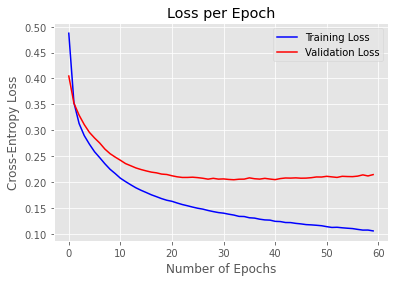

In [51]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

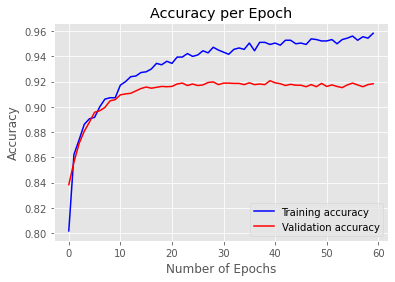

In [52]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [53]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.6, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.95875
0.9238888888888889


In [54]:
yhat_svm = clf.predict(x_test)
yhat_train_svm = clf.predict(x_train)

print('Classification Accuracy validation set {}'.format(accuracy_score(y_test,yhat_svm)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(yhat_train_svm,y_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(y_test,yhat_svm))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(yhat_train_svm,y_train))

Classification Accuracy validation set 0.9238888888888889
-------------------------------------------------------------
Classification Accuracy training set 0.95875
-------------------------------------------------------------
Confusion Matrix validation set:
[[1888  104]
 [ 170 1438]]
-------------------------------------------------------------
Confusion Matrix training set:
[[1306   69]
 [  30  995]]


In [55]:
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(feat,features, test_size = 0.6, shuffle=True)

log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.342772
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           20
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.5022
Time:                        15:19:12   Log-Likelihood:                -822.65
converged:                       True   LL-Null:                       -1652.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0810      0.064     -1.273      0.203      -0.206       0.044
1             -0.7753      0.

In [56]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.score(x_train,y_train))

0.8780555555555556
0.8733333333333333


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8583333333333333
0.8669444444444444
